### Technical Notebook
Title: Impacts on Data Science Salaries

Members: Michelle J. Kim, Ian Reinert

Looking at effects of region, role on data science salaries. 
See SalaryDataScraper notebook for data stream information.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import data_cleaning as dc
import matplotlib.pyplot as plt
import seaborn as sns
import visualizations as viz
import hypothesis_tests as ht
from scipy import stats

# dirty_data = pd.read_csv('./data/dirty_data.csv')
clean = dc.full_clean()
clean.head()

,company,location,role,salary,startdate,status,submitdate,year,region,industry
0,THE MATLEN SILVER GROUP INC,"CHARLOTTE, NC",DATA SCIENTIST,170000,01/05/2015,CERTIFIED,12/12/2014,2014,OTHER,OTHER
1,THOUGHTWORKS INC,"CHICAGO, IL",DATA SCIENTIST,71718,09/29/2014,CERTIFIED,09/29/2014,2014,OTHER,OTHER
2,EVANTAGE SOLUTIONS INC,"BELLEVUE, WA",DATA SCIENTIST,73923,12/15/2014,CERTIFIED,12/15/2014,2014,OTHER,OTHER
3,HOTWIRE INC,"BELLEVUE, WA",DATA SCIENTIST,74755,10/20/2014,CERTIFIED,10/08/2014,2014,OTHER,TECH
4,FINO CONSULTING LLC,"NEW YORK, NY",DATA SCIENTIST,82000,10/20/2014,CERTIFIED,10/16/2014,2014,NYC,CONSULTING


In [3]:
# Sample Constraints
years = list(range(2014,2020))
years = [str(y) for y in years]
years

['2014', '2015', '2016', '2017', '2018', '2019']

<b> Exploratory Data Analysis</b>

1. Are HB1 Visas for Data Scientists increasing? 

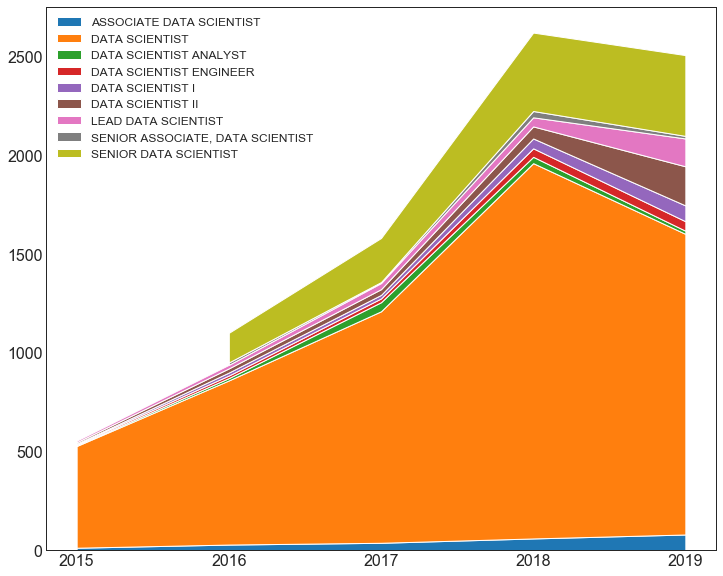

In [6]:
counts = pd.pivot_table(clean, values='status', columns='role',
                           index='year', aggfunc='count')
labels = list(counts.columns)
area_data = [counts.loc[x, :].tolist() for x in counts.index]
area_data_t = list(map(list, zip(*area_data)))
fig = plt.figure(figsize=(12, 10))
fig = plt.stackplot(years, area_data_t, labels=labels)
plt.legend(fontsize=12, loc='upper left')
plt.show()

Yes, as is specialization.

2) Are Salaries changing over time? 

In [9]:
h1b1 = clean

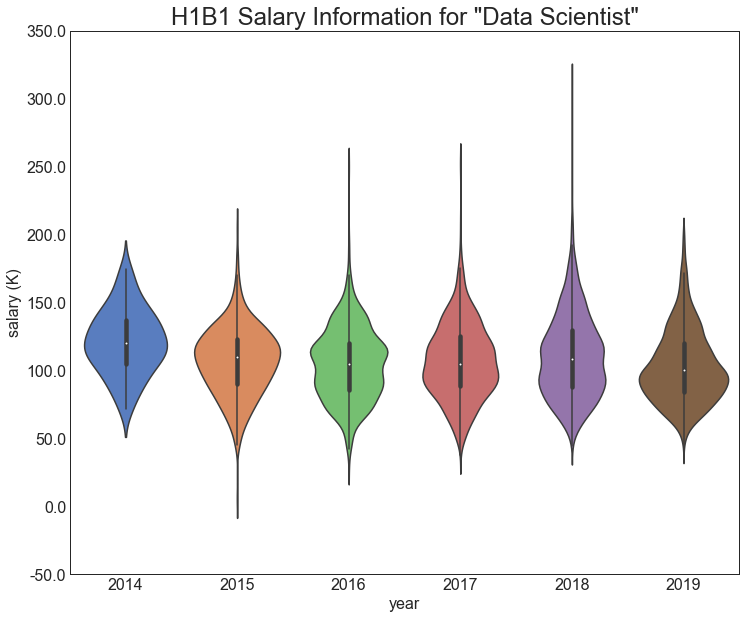

In [10]:
fig = plt.figure(figsize = (12,10))
ax = sns.violinplot(x="year", y="salary", data=h1b1[h1b1['role']=='DATA SCIENTIST'], palette="muted")
locs,labels = plt.yticks()
ticks = ax.get_yticks()
plt.ylabel('salary (K)')
plt.yticks(locs, ticks/1000)
sns.set_context('poster')
sns.set_style("darkgrid")
plt.title('H1B1 Salary Information for "Data Scientist"')
# fig.savefig("images/h1b1_violin.png")
plt.show()

Salaries overall are steady. 

Let's break out by industry and location

In [11]:
h1b1.columns

Index(['company', 'location', 'role', 'salary', 'startdate', 'status',
       'submitdate', 'year', 'region', 'industry'],
      dtype='object')

In [12]:
# Create Regional Tags

# Example
h1b1.loc[h1b1.location.map(lambda x: ', CA' in x)].location.unique()
h1b1.loc[h1b1.location.map(lambda x: ', NY' in x)].location.unique()


bay_area = ['ALAMEDA, CA', 'BELMONT, CA', 'BENICIA, CA', 'BERKELEY, CA', 'BRISBANE, CA', 'BURLINGAME, CA', 'CAMPBELL, CA',
       'CUPERTINO, CA', 'DUBLIN, CA', 'EAST PALO ALTO, CA','EL CERRITO, CA', 'EMERYVILLE, CA', 'FOLSOM, CA',
       'FOSTER CITY, CA', 'FREMONT, CA',  'HERCULES, CA', 'LOS ALTOS, CA', 'LOS GATOS, CA', 'MENLO PARK, CA',
       'MILL VALLEY, CA', 'MILLBRAE, CA', 'MILPITAS, CA', 'MOUNTAIN VIEW, CA', 'NEWARK, CA', 'NOVATO, CA',
       'OAKLAND, CA', 'PALO  ALTO, CA', 'PALO ALTO, CA', 'PASADENA, CA', 'PETALUMA, CA', 'PLEASANT HILL, CA', 'PLEASANTON, CA',
       'REDLANDS, CA', 'REDWOOD CITY, CA', 'REDWOOD SHORES, CA', 'RICHMOND, CA', 'SAN BRUNO, CA', 'SAN CARLOS, CA',
       'SAN FANCISCO, CA', 'SAN FRANCICSCO, CA', 'SAN FRANCISCO, CA', 'SAN FRANCISCO, CA, CA', 'SAN JOSE, CA',  'SAN MATEO, CA',
       'SAN RAMON, CA', 'SANJOSE, CA', 'SAUSALITO, CA', 'SOUTH SAN FRANCISCO, CA', 'SUNNYVALE, CA', 'TIBURON, CA', 'UNION CITY, CA',
       'VALLEJO, CA', 'VENICE, CA', 'WALNUT CREEK, CA','SAN FRANCISCO, VA']



# bay_area = ['MOUNTAIN VIEW, CA', 'FREMONT, CA', 'SAN JOSE, CA', 'SAN FRANCISCO, CA', 'SAN MATEO, CA', 'MILPITAS, CA', 'PALO ALTO, CA', 'FOSTER CITY, CA', 'HOLLYWOOD, CA',
#         'MENLO PARK, CA', 'SANTA CLARA, CA', 'SAN CARLOS, CA', 'REDWOOD CITY, CA', 'CAMPBELL, CA', 'SUNNYVALE, CA', 'MILL VALLEY, CA',  'SAN FRANCISCO, CA, CA', 'EMERYVILLE, CA',
#         'CUPERTINO, CA', 'LOS ALTOS, CA', 'SAN BRUNO, CA', 'BURLINGAME, CA', 'BERKELEY, CA', 'NEWARK, CA', 'SAN FRANCICSCO, CA', 'PALO  ALTO, CA', 'OAKLAND, CA', 
#         'MILLBRAE, CA', 'DUBLIN, CA', 'SAUSALITO, CA', 'REDWOOD SHORES, CA', 'BRISBANE, CA', 'WALNUT CREEK, CA','NOVATO, CA', 'EAST PALO ALTO, CA', 'SANJOSE, CA','EL CERRITO, CA', 
#         'VALLEJO, CA', 'UNION CITY, CA', 'TIBURON, CA', 'LAFAYETTE, CA', 'SOUTH SAN FRANCISCO, CA', 'MODESTO, CA', 'RICHMOND, CA', 'BELMONT, CA', 'PLEASANT HILL, CA', 'SAN FANCISCO, CA',
#         'ALAMEDA, CA', 'TUSTIN, CA', 'PETALUMA, CA', 'REDLANDS, CA', 'AUSTIN, CA','LOS GATOS, CA','SAN FRANCISCO, VA']

nyc = ['NEW YORK, NY',  'BROOKLYN, NY', 'NEW  YORK, NY', 'NEW YORK CITY, NY', 'IRVINGTON, NY', 'LONG ISLAND CITY, NY', 'NYC, NY']
longisland = ['EAST MEADOW, NY','FARMINGDALE, NY', 'PORT WASHINGTON, NY','LONG BEACH, NY', 'MELVILLE, NY','LYNBROOK, NY','JERICHO, NY', 'UNIONDALE, NY']
westchester= ['ARMONK, NY','WHITE PLAINS, NY',  'YONKERS, NY','TARRYTOWN, NY','SPRING VALLEY, NY', 'SOMERS, NY','SOMMERS, NY','VALHALLA, NY','SOMERS, NY', 'YORKTOWN HEIGHTS, NY','YORKTOWN HIEGHTS, NY','WOODBURY, NY']

dmv = ['WASHINGTON, DC', 'WASHINGTON, DC, DC', 'WASHINGTON DC, DC','MCLEAN, VA','RETSON, VA', 'STERLING, VA', 'ALEXANDRIA, VA', 'ARLINGTON, VA', 'HERNDON, VA', 'ASHBURN, VA', 'MANASSAS, VA', 'RESTON, VA', 
    'FALLS CHURCH, VA','FAIRFAX, VA', 'DULLES, VA','BETHESDA, MD', 'SILVER SPRING, MD','COLUMBIA, MD','ROCKVILLE, MD']

# Add a columns for the split
h1b1['region'] = ['BAYAREA'  if x in bay_area else 'NYC' if x in nyc else 'DC' if x in dmv else 'OTHER' for x in h1b1.location]
    

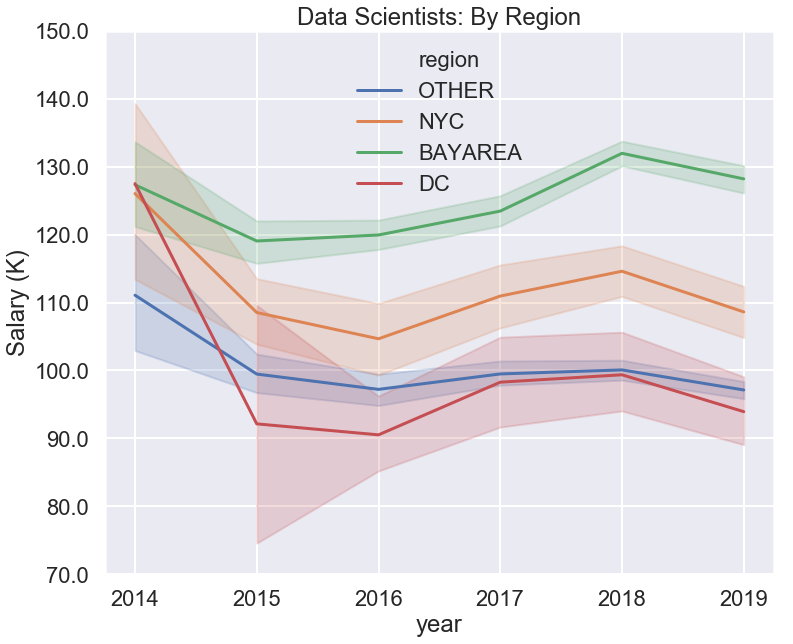

In [10]:
# Bay Area versus NY
fig = plt.figure(figsize = (12,10))
ax = sns.lineplot(x="year", y="salary",data=h1b1, hue='region')
locs,labels = plt.yticks()
ticks = ax.get_yticks()
plt.ylabel('Salary (K)')
plt.yticks(locs, ticks/1000)
sns.set_context('poster')
sns.set_style("darkgrid")

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[1:],['Bay Area','NY'])

# n_data = len(h1b1[h1b1['Role']=='DATA SCIENTIST'])

plt.title('Data Scientists: By Region')
fig.savefig("img/timeseries_region.png")
plt.show()

Let's visually check the distribution of salary accross roles.

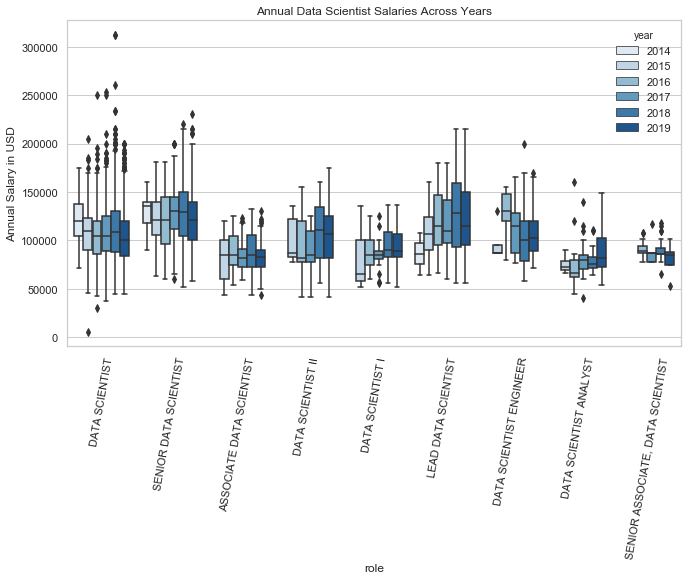

In [11]:
sns.set(style="whitegrid")
dims = (11, 6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.boxplot(x=h1b1["role"],
                 y=h1b1['salary'], hue=h1b1['year'], palette='Blues')
plt.xticks(rotation=80)
plt.ylabel("Annual Salary in USD")
plt.title("Annual Data Scientist Salaries Across Years")
fig.savefig("img/timeseries_role_boxplots.png")
plt.show()

Comparing accross more than two years is problematic so lets see when the bulk of our data comes from.

In [12]:
h1b1.groupby('year')['salary'].agg(['count'])

,count
year,
2014,82
2015,658
2016,1101
2017,1581
2018,2621
2019,2507


So the bulk of our data comes from the last four years. Let's focus on the last three (2017-2019) as they account for over half the data and they are the most recent and therefore likely to be the most relevant.

Based on the above boxplot, it also looks like some roles may be quite rare. Let's check to confirm.

In [13]:
recent_years = [2017, 2018, 2019]
for year in recent_years:
    print(year)
    print(ht.slice_by_year(h1b1, year).groupby('role')['salary'].nunique().sort_values(ascending=False)[0:9], "\n")

2017
role
DATA SCIENTIST                      411
SENIOR DATA SCIENTIST               119
ASSOCIATE DATA SCIENTIST             30
LEAD DATA SCIENTIST                  25
DATA SCIENTIST II                    21
DATA SCIENTIST ANALYST               19
DATA SCIENTIST ENGINEER              15
DATA SCIENTIST I                     11
SENIOR ASSOCIATE, DATA SCIENTIST      3
Name: salary, dtype: int64 

2018
role
DATA SCIENTIST                      614
SENIOR DATA SCIENTIST               199
DATA SCIENTIST II                    47
LEAD DATA SCIENTIST                  40
ASSOCIATE DATA SCIENTIST             38
DATA SCIENTIST I                     32
DATA SCIENTIST ENGINEER              32
DATA SCIENTIST ANALYST               25
SENIOR ASSOCIATE, DATA SCIENTIST     14
Name: salary, dtype: int64 

2019
role
DATA SCIENTIST                      471
SENIOR DATA SCIENTIST               198
DATA SCIENTIST II                   119
LEAD DATA SCIENTIST                  94
ASSOCIATE DATA SCIENTIST        

Some of the roles are quite few. To increase statistical power, let's create a focused dataframe with only the last three years and the top four roles which appear consistently in the top five each year: 'DATA SCIENTIST,' 'SENIOR DATA SCIENTIST,' 'LEAD DATA SCIENTIST,' and 'ASSOCIATE DATA SCIENTIST.' We are only focusing on salary, year, region and possibly industry, so we can drop the other columns. 

In [14]:
top_4_roles_recent_years = ht.focus_data(h1b1)

Focusing the data also makes our descriptive statistics easier to view. Let's take a look at our stats for our first hypthosesis (H1) on salary and roles.

In [15]:
ht.describe_dependent_by_year_and_group(top_4_roles_recent_years, 'salary', 'role')

2017


,count,mean,std,min,25%,50%,75%,max
role,,,,,,,,
ASSOCIATE DATA SCIENTIST,38.0,84024.710526,16873.650681,59300.0,72000.00,81729.5,90561.75,122824.0
DATA SCIENTIST,1172.0,106862.483788,27772.215852,37482.0,88907.25,105000.0,125000.00,253630.0
LEAD DATA SCIENTIST,31.0,119688.580645,31724.148571,60000.0,97572.50,110000.0,141961.50,180000.0
SENIOR DATA SCIENTIST,223.0,130652.874439,26972.536731,60000.0,111824.00,130000.0,145067.50,200018.0


2018


,count,mean,std,min,25%,50%,75%,max
role,,,,,,,,
ASSOCIATE DATA SCIENTIST,60.0,86975.650000,21153.582666,43056.0,72009.50,85000.0,105209.25,132000.0
DATA SCIENTIST,1900.0,110522.278421,31166.132185,44574.0,87735.25,108118.0,130000.00,312000.0
LEAD DATA SCIENTIST,46.0,125329.934783,39067.803285,56118.0,93275.00,128170.0,159625.00,215000.0
SENIOR DATA SCIENTIST,397.0,129106.002519,30298.430160,51522.0,105000.00,129522.0,150000.00,220000.0


2019


,count,mean,std,min,25%,50%,75%,max
role,,,,,,,,
ASSOCIATE DATA SCIENTIST,80.0,83138.150000,16323.688590,44000.0,72098.25,82559.0,90000.0,130000.0
DATA SCIENTIST,1522.0,102896.364652,26606.151930,44117.0,84280.00,100000.0,119903.0,200000.0
LEAD DATA SCIENTIST,141.0,122314.333333,34983.796657,56118.0,95000.00,115211.0,150000.0,215000.0
SENIOR DATA SCIENTIST,409.0,122798.875306,29978.618983,57886.0,100000.00,120540.0,140000.0,231000.0


None of the sample sizes are too low. This does give an impression that there is a difference. Let's look at the descriptives stats for our second hypothesis test on salaries accross regions.

In [16]:
ht.describe_dependent_by_year_and_group(top_4_roles_recent_years, 'salary', 'region')

2017


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
BAYAREA,522.0,123659.379310,26971.301311,49733.0,105000.0,124342.0,140000.0,253630.0
DC,21.0,98311.523810,17594.697211,65000.0,87000.0,99694.0,110000.0,130000.0
NYC,124.0,111308.838710,28458.265702,50000.0,90000.0,109038.5,127375.0,250000.0
OTHER,797.0,101461.321205,27391.562141,37482.0,82000.0,100000.0,118450.0,210000.0


2018


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
BAYAREA,830.0,132316.413253,28950.266552,60000.0,111792.25,130000.0,150000.0,260000.0
DC,50.0,102310.260000,24767.517993,67300.0,85506.50,99128.0,110750.0,182700.0
NYC,228.0,115446.030702,28568.575834,60000.0,94766.50,114458.5,135000.0,215000.0
OTHER,1295.0,101136.136680,28570.637420,43056.0,80000.00,95826.0,118000.0,312000.0


2019


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
BAYAREA,595.0,128301.971429,27185.100764,51355.0,109171.0,129605.0,143104.0,215000.0
DC,49.0,93124.795918,18746.657050,52000.0,84677.0,90688.0,104500.0,151112.0
NYC,228.0,109313.254386,29329.749534,60000.0,87491.0,102600.0,125000.0,231000.0
OTHER,1280.0,97581.382812,24959.373727,44000.0,80850.0,94110.0,110000.0,200000.0


Again, just the means suggest that there is a difference and with the possible exception of DC in 2017, none of the groups are too small. 

Mean salaries in DC and 'Other' regions look similar as does lead data scientist and senior data scientist.

Let's move on to testing our two hypotheses.

<b> Hypothesis Testing </b>

We initially had 3 hypotheses questions which we asked for each of our years:

### Hypotheses:
<p><em>
H0<sub>role</sub>: The mean salary of all roles are not significantly different from each other.<br>
H1<sub>role</sub>: The mean salary of at least one role is significantly different from another<br>
<br>
H0<sub>region</sub>: The mean salary of all regions are not significantly different from each other.<br>
H1<sub>region</sub>: The mean salary of at least one regions is significantly different from another.<br>
<br>
H0<sub>interaction</sub>: There is significant no interaction between the role and region.<br>
H1<sub>interaction</sub>: There is interaction between roles and regions.
</em></p>

Our initial plan is to conduct a two-way ANOVA for as we think it is possible role and region have a relationship. When done for 2017, 2018, and 2019, this would create a total of 9 hypotheses, with 3 per year.

We tested the 6 assumptions of an ANOVA:
1. The dependent variable is continuous.
2. Categorical variable groups (roles and regions) are independent.
3. Observations are independent of the groups.
4. No significant outliers.
5. The dependent variable is normally distributed for each group.
6. Homogenous variances for our independent variables

We count the first 3 as already met. Salary is continuous, it is unlikely that a visa request would be for two regions or roles, and we assume that the visa requests are made independently of each other.

#### 4th assumption

We'll drop some of the extreme outlier. Salaries below \$30000 seem unlikely while only one firm accounts for the two salaries above 300000 USD so we'll drop these outliers.

In [17]:
before_drop = len(top_4_roles_recent_years)
top_4_roles_recent_years = top_4_roles_recent_years[top_4_roles_recent_years['salary']>40000]# three values, likely typos or atypical contracts
top_4_roles_recent_years = top_4_roles_recent_years[top_4_roles_recent_years['salary']<300000] # two values, larson living labs
top_4_roles_recent_years = top_4_roles_recent_years.drop_duplicates()# several repeat entries
print(str(round(before_drop/len(top_4_roles_recent_years)*100, 1)) + '%')

195.7%


#### 5th assumption

We first will do this visually with quantile-quantile plots (we want the distribution to match the theoretical normal distribution represented by the red line).

2017
role


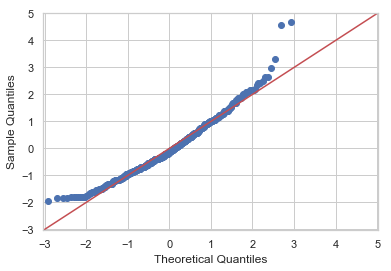

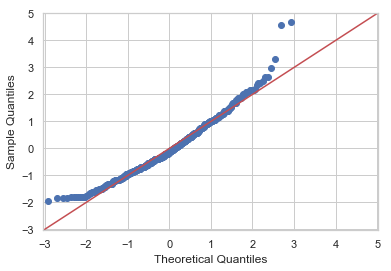

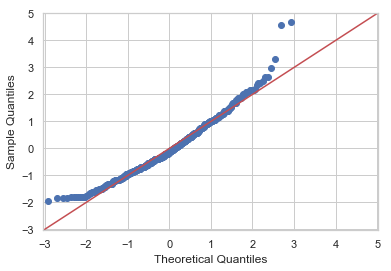

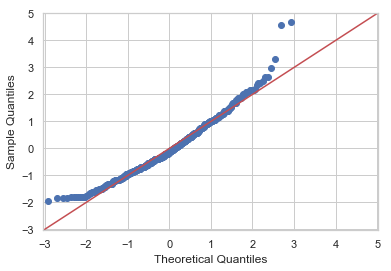

None
region


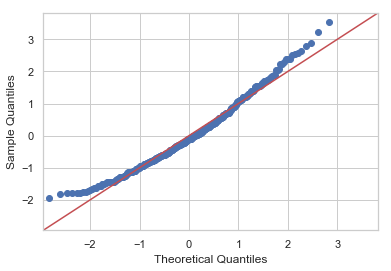

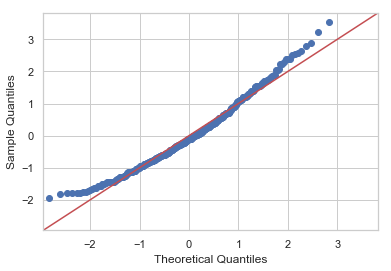

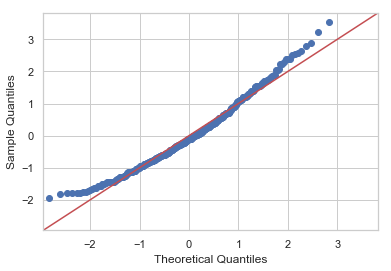

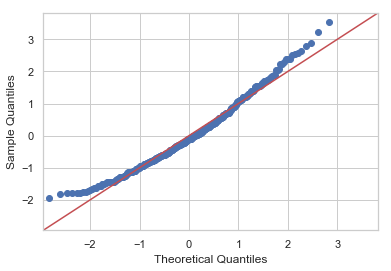

None
2018
role


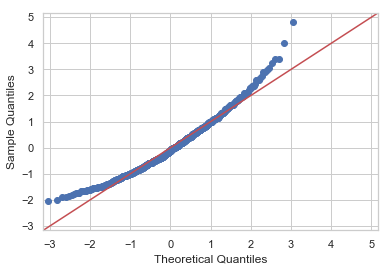

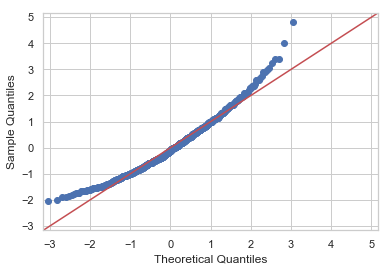

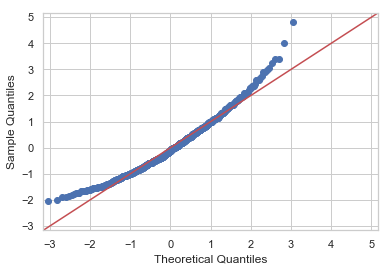

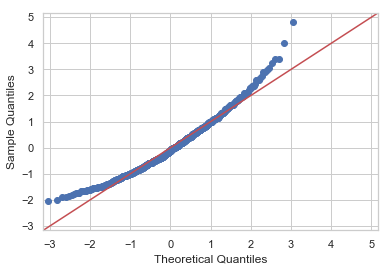

None
region


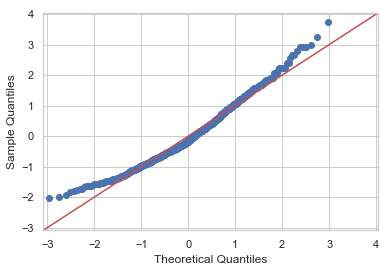

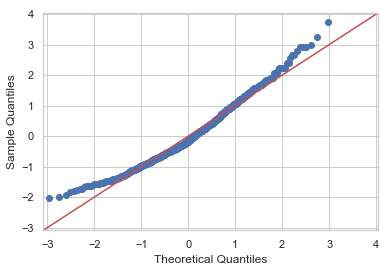

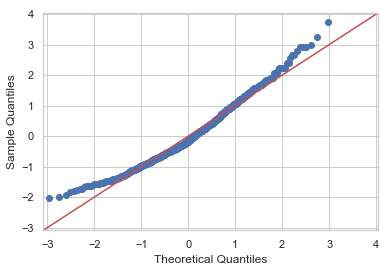

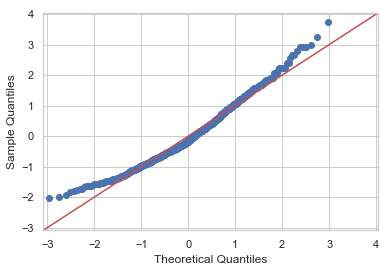

None
2019
role


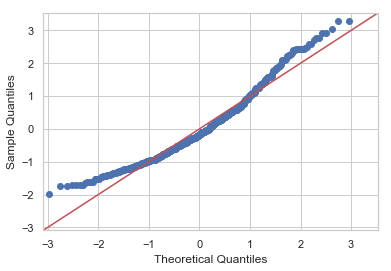

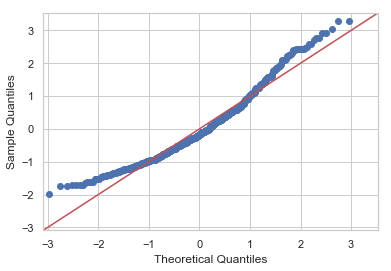

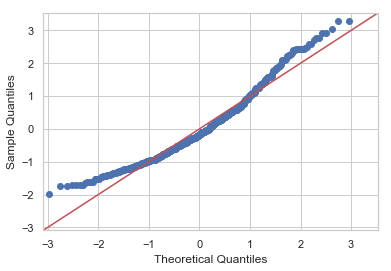

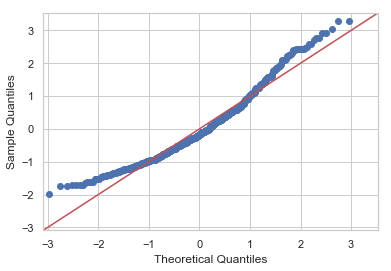

None
region


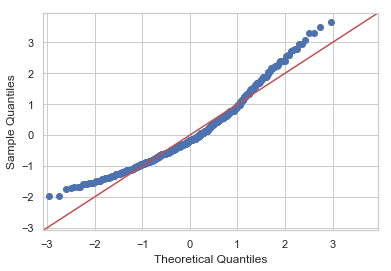

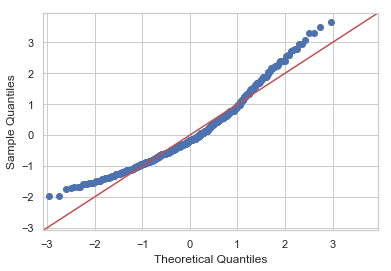

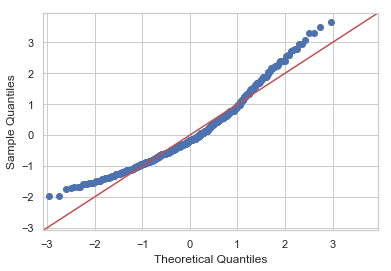

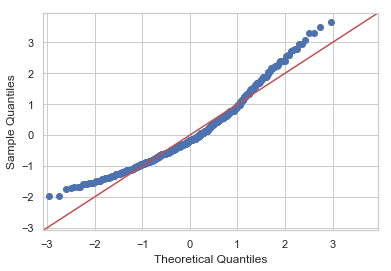

None


In [18]:
ht.qq_test_years(top_4_roles_recent_years)

None of these look particularly normal given the kurtosis at the ends. We'll use a Shapiro-Wilk test to confirm. In this case we want to fail to reject the null hypothesis.

In [19]:
ht.normality_test_years(top_4_roles_recent_years)

2017
DATA SCIENTIST
Shapiro-Wilk test
p-value=5.224593202513006e-09, DOES NOT satisfy #5.
SENIOR DATA SCIENTIST
Shapiro-Wilk test
p-value=0.5826252102851868, SATISFIES #5.
ASSOCIATE DATA SCIENTIST
Shapiro-Wilk test
p-value=0.09818991273641586, SATISFIES #5.
LEAD DATA SCIENTIST
Shapiro-Wilk test
p-value=0.43667957186698914, SATISFIES #5.
None
OTHER
Shapiro-Wilk test
p-value=1.0665295349099324e-06, DOES NOT satisfy #5.
BAYAREA
Shapiro-Wilk test
p-value=0.0663527175784111, SATISFIES #5.
NYC
Shapiro-Wilk test
p-value=0.01442106906324625, DOES NOT satisfy #5.
DC
Shapiro-Wilk test
p-value=0.7705062627792358, SATISFIES #5.
None
2018
DATA SCIENTIST
Shapiro-Wilk test
p-value=8.294852651968831e-12, DOES NOT satisfy #5.
SENIOR DATA SCIENTIST
Shapiro-Wilk test
p-value=0.12622369825839996, SATISFIES #5.
ASSOCIATE DATA SCIENTIST
Shapiro-Wilk test
p-value=0.3856259882450104, SATISFIES #5.
LEAD DATA SCIENTIST
Shapiro-Wilk test
p-value=0.1232239305973053, SATISFIES #5.
None
OTHER
Shapiro-Wilk test
p-va

In [20]:
for year in recent_years:
    df_year = ht.slice_by_year(top_4_roles_recent_years, year)
    print(year)
    ht.normality_test_4_groups(df_year, 'salary', 'role')

2017
DATA SCIENTIST
Shapiro-Wilk test
p-value=5.224593202513006e-09, DOES NOT satisfy #5.
SENIOR DATA SCIENTIST
Shapiro-Wilk test
p-value=0.5826252102851868, SATISFIES #5.
ASSOCIATE DATA SCIENTIST
Shapiro-Wilk test
p-value=0.09818991273641586, SATISFIES #5.
LEAD DATA SCIENTIST
Shapiro-Wilk test
p-value=0.43667957186698914, SATISFIES #5.
2018
DATA SCIENTIST
Shapiro-Wilk test
p-value=8.294852651968831e-12, DOES NOT satisfy #5.
SENIOR DATA SCIENTIST
Shapiro-Wilk test
p-value=0.12622369825839996, SATISFIES #5.
ASSOCIATE DATA SCIENTIST
Shapiro-Wilk test
p-value=0.3856259882450104, SATISFIES #5.
LEAD DATA SCIENTIST
Shapiro-Wilk test
p-value=0.1232239305973053, SATISFIES #5.
2019
DATA SCIENTIST
Shapiro-Wilk test
p-value=2.994523845469693e-13, DOES NOT satisfy #5.
SENIOR DATA SCIENTIST
Shapiro-Wilk test
p-value=4.1187260649167e-05, DOES NOT satisfy #5.
ASSOCIATE DATA SCIENTIST
Shapiro-Wilk test
p-value=0.41001227498054504, SATISFIES #5.
LEAD DATA SCIENTIST
Shapiro-Wilk test
p-value=0.063385181

It looks like the failure here is confirmed. This makes sense as we haven't taken a random sample, nor are salaries necessarily normally distributed.

#### 6th assumption

While the 5th assumption has failed, some of the categories were normally distributed. We can check the 6th assumption with a Levene's test (again we're looking for non-signficant results.

In [21]:
ht.homogenity_test_years(top_4_roles_recent_years)

2017
role
LeveneResult(statistic=3.6821393131593623, pvalue=0.011861604142175566)
region
LeveneResult(statistic=2.4261381882203183, pvalue=0.06437291278735295)
2018
role
LeveneResult(statistic=4.798332112098462, pvalue=0.0025062435841427186)
region
LeveneResult(statistic=1.4482443144783428, pvalue=0.22713970122561114)
2019
role
LeveneResult(statistic=9.232338856563963, pvalue=4.933997688516546e-06)
region
LeveneResult(statistic=6.234925118432368, pvalue=0.0003377678526716909)


Again a failure to find homogeneity for each group. Given that we have not met the 5th and 6th assumptions we will not be able to use an ANOVA. The alternative is to use a non-parametric Kruskal-Wallis test.

In [22]:
ht.hypothesis_test_one(top_4_roles_recent_years)

Kruskal-Wallis Test results for 2017's data:
role
Statistics = 99.733, p = 0.00
Different distributions (reject H0) 

None
Kruskal-Wallis Test results for 2018's data:
role
Statistics = 108.227, p = 0.00
Different distributions (reject H0) 

None
Kruskal-Wallis Test results for 2019's data:
role
Statistics = 114.200, p = 0.00
Different distributions (reject H0) 

None


We have failed to reject our first null-hypothesis. There is evidence of a significant difference between the average salaries of roles in all three years. We will do a Conover-Iman test to determine which roles are signficantly different (a value of more than 0.05 indicates a difference).

In [23]:
ht.posthoc_test_years(top_4_roles_recent_years, 'salary', 'role')

2017


,ASSOCIATE DATA SCIENTIST,DATA SCIENTIST,LEAD DATA SCIENTIST,SENIOR DATA SCIENTIST
ASSOCIATE DATA SCIENTIST,-1.0,0.000,0.000,0.000
DATA SCIENTIST,0.0,-1.000,0.069,0.000
LEAD DATA SCIENTIST,0.0,0.069,-1.000,0.069
SENIOR DATA SCIENTIST,0.0,0.000,0.069,-1.000


2018


,ASSOCIATE DATA SCIENTIST,DATA SCIENTIST,LEAD DATA SCIENTIST,SENIOR DATA SCIENTIST
ASSOCIATE DATA SCIENTIST,-1.0,0.000,0.000,0.000
DATA SCIENTIST,0.0,-1.000,0.002,0.000
LEAD DATA SCIENTIST,0.0,0.002,-1.000,0.392
SENIOR DATA SCIENTIST,0.0,0.000,0.392,-1.000


2019


,ASSOCIATE DATA SCIENTIST,DATA SCIENTIST,LEAD DATA SCIENTIST,SENIOR DATA SCIENTIST
ASSOCIATE DATA SCIENTIST,-1.0,0.0,0.000,0.000
DATA SCIENTIST,0.0,-1.0,0.000,0.000
LEAD DATA SCIENTIST,0.0,0.0,-1.000,0.872
SENIOR DATA SCIENTIST,0.0,0.0,0.872,-1.000


With the exception of Senior Data Scientists and Lead Data Scientists, all roles have significantly different salaries. It seems like the variance has become more significantly different up until now.

H0<sub>role</sub>: The mean salary of all roles are not significantly different.<br>
<b>H1<sub>role</sub>: The mean salary of at least one role is significantly different.<br>
</b>

We'll move onto the second hypothesis test on regional differences in salary.

In [24]:
ht.hypothesis_test_two(top_4_roles_recent_years)

Kruskal-Wallis Test results for 2017's data:
region
Statistics = 71.405, p = 0.00
Different distributions (reject H0) 

None
Kruskal-Wallis Test results for 2018's data:
region
Statistics = 167.991, p = 0.00
Different distributions (reject H0) 

None
Kruskal-Wallis Test results for 2019's data:
region
Statistics = 195.439, p = 0.00
Different distributions (reject H0) 

None


In [25]:
ht.posthoc_test_years(top_4_roles_recent_years, 'salary', 'region')

2017


,BAYAREA,DC,NYC,OTHER
BAYAREA,-1.000,0.002,0.019,0.000
DC,0.002,-1.000,0.132,0.426
NYC,0.019,0.132,-1.000,0.059
OTHER,0.000,0.426,0.059,-1.000


2018


,BAYAREA,DC,NYC,OTHER
BAYAREA,-1.0,0.000,0.000,0.000
DC,0.0,-1.000,0.016,0.901
NYC,0.0,0.016,-1.000,0.000
OTHER,0.0,0.901,0.000,-1.000


2019


,BAYAREA,DC,NYC,OTHER
BAYAREA,-1.0,0.000,0.0,0.000
DC,0.0,-1.000,0.0,0.308
NYC,0.0,0.000,-1.0,0.000
OTHER,0.0,0.308,0.0,-1.000


Once again we fail to reject the null-hypothesis:

H0<sub>region</sub>: The mean salary of all regions are not significantly different.<br>
<b>H1<sub>region</sub>: The mean salary of at least one region is significantly different.<br></b>

<b> Findings and Applications </b>

From our first hypothesis test we find that:
<em>    
All roles are significantly different except for Lead Data Scientists and Senior Data Scientists.</em>

Unlike roles, regional differences seem to be more mixed, however, we can draw three conclusions from our second hypothesis test:

<em>
1) First, the Bay Area remains significantly different thoughout all years.
2) Second, NYC's foreign data scientists' average salary has only become significantly different from DC's since 2018.<br>
3) Third, DC's foreign data scientist market remains similar to other markets (possibly less mature).</em>

For application, we conclude that the data science market has matured in the last three years as lead data scientist and senior data scientist roles' average salary has converged. It also looks like those seeking higher salaries post-2018 would be better heading to NYC or the Bay Area. For those looking to enter the market, staying in DC could mean a lower salary, but this might be a good thing if DC follows the trajectory of NYC.

<b> Limitations and Next Steps</b>

2 limitations and next steps:<br>

1) <em>Interaction</em>: Given time and resources, we were not able to account for the possible influence role and relation have on one another.
<em>Next step</em>: Welch's two-way ANOVA in python.

2) <em>Effect size</em>: Calculating effect size for a Kruskal-Wallis test is much more complex than for a two-way ANOVA, so our guess at how much higher a typical salary today is in NYC than in DC remains based on descriptive statistics.
<em>Next step</em>: Welch's two-way ANOVA in python.